# **EDA PROJECT 3:**
# **Mapping Parkinson's Journey: An Exploratory Analysis of Telemonitoring Data**

---



# **About the Project**
* * *
---
This project undertakes an Exploratory Data Analysis (EDA) of a Parkinson's disease telemonitoring dataset. The dataset comprises biomedical voice measurements collected from individuals with early-stage Parkinson's disease during a six-month clinical trial utilizing a telemonitoring device. The primary objective of this EDA is to gain a comprehensive understanding of the dataset's structure, the characteristics of vocal features and clinical scores (UPDRS), and to explore the relationships and trends within the data over time. The insights gained will shed light on the variability of Parkinson's disease progression and the potential of telemonitoring data, particularly voice features, as indicators of disease severity and progression.
* * *

In [ ]:
# Download dataset directly from Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download dankok/oxford-parkinsons-disease-telemonitoring-dataset
! unzip oxford-parkinsons-disease-telemonitoring-dataset.zip

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/dankok/oxford-parkinsons-disease-telemonitoring-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/290k [00:00<?, ?B/s]
100% 290k/290k [00:00<00:00, 559MB/s]
Archive:  oxford-parkinsons-disease-telemonitoring-dataset.zip
  inflating: parkinsons.csv          


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the parkinson's disease telemonitoring dataset
parkison_dis_data = pd.read_csv("/content/parkinsons.csv")

# **Initial Review of Data**
---
---

In [4]:
# Explore the first 5 records
parkison_dis_data.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [5]:
# Explore the last 5 records
parkison_dis_data.tail()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
5870        42   61    0     142.79       22.485       33.485    0.00406   
5871        42   61    0     149.84       21.988       32.988    0.00297   
5872        42   61    0     156.82       21.495       32.495    0.00349   
5873        42   61    0     163.73       21.007       32.007    0.00281   
5874        42   61    0     170.73       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
5870     0.000031     0.00167      0.00168  ...        0.160       0.00973   
5871     0.000025     0.00119      0.00147  ...        0.215       0.01052   
5872     0.000025     0.00152      0.00187  ...        0.244       0.01371   
5873     0.000020     0.00128      0.00151  ...        0.131       0.00693   
5874     0.000021     0.00135      0.00166  ...        0.171       0.00946   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
5870       0.01133        0.01549      0.02920  0.025137  22.369  0.64215   
5871       0.01277        0.01904      0.03157  0.011927  22.886  0.52598   
5872       0.01456        0.01877      0.04112  0.017701  25.065  0.47792   
5873       0.00870        0.01307      0.02078  0.007984  24.422  0.56865   
5874       0.01154        0.01470      0.02839  0.008172  23.259  0.58608   

          DFA      PPE  
5870  0.55314  0.21367  
5871  0.56518  0.12621  
5872  0.57888  0.14157  
5873  0.56327  0.14204  
5874  0.57077  0.15336  

[5 rows x 22 columns]

In [6]:
# Find out the total number of rows and columns in the dataset
parkison_dis_data.shape

(5875, 22)

**Observations:**



*  Dataset consist of 5875 observations(rows) and 22 features(columns).



In [7]:
# Explore the Data types of the features (Columns)
parkison_dis_data.dtypes.to_frame("Data Types")

Data Types
subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64

**Observations:**
* The dataset primarily consists of numerical features with a float64 data type, representing continuous measurements.
* The subject#, age, and sex columns have an int64 data type. These likely serve as identifiers and categorical information.
* There is no object data type column in this dataset.

In [12]:
# Number of occurrences of each unique values of the categorical features
parkison_dis_data[['age', 'sex']].nunique().to_frame("Unique Values")

Unique Values
age             23
sex              2

**Observation:**
* The sex column contain two distinct categories, while the age column contains 23 unique values, suggesting a diverse age range among the subjects.

In [8]:
# Statistical overview of the dataset
parkison_dis_data.describe().T

count       mean        std        min        25%        50%  \
subject#       5875.0  21.494128  12.372279   1.000000  10.000000  22.000000   
age            5875.0  64.804936   8.821524  36.000000  58.000000  65.000000   
sex            5875.0   0.317787   0.465656   0.000000   0.000000   0.000000   
test_time      5875.0  92.863722  53.445602  -4.262500  46.847500  91.523000   
motor_UPDRS    5875.0  21.296229   8.129282   5.037700  15.000000  20.871000   
total_UPDRS    5875.0  29.018942  10.700283   7.000000  21.371000  27.576000   
Jitter(%)      5875.0   0.006154   0.005624   0.000830   0.003580   0.004900   
Jitter(Abs)    5875.0   0.000044   0.000036   0.000002   0.000022   0.000035   
Jitter:RAP     5875.0   0.002987   0.003124   0.000330   0.001580   0.002250   
Jitter:PPQ5    5875.0   0.003277   0.003732   0.000430   0.001820   0.002490   
Jitter:DDP     5875.0   0.008962   0.009371   0.000980   0.004730   0.006750   
Shimmer        5875.0   0.034035   0.025835   0.003060   0.019120   0.027510   
Shimmer(dB)    5875.0   0.310960   0.230254   0.026000   0.175000   0.253000   
Shimmer:APQ3   5875.0   0.017156   0.013237   0.001610   0.009280   0.013700   
Shimmer:APQ5   5875.0   0.020144   0.016664   0.001940   0.010790   0.015940   
Shimmer:APQ11  5875.0   0.027481   0.019986   0.002490   0.015665   0.022710   
Shimmer:DDA    5875.0   0.051467   0.039711   0.004840   0.027830   0.041110   
NHR            5875.0   0.032120   0.059692   0.000286   0.010955   0.018448   
HNR            5875.0  21.679495   4.291096   1.659000  19.406000  21.920000   
RPDE           5875.0   0.541473   0.100986   0.151020   0.469785   0.542250   
DFA            5875.0   0.653240   0.070902   0.514040   0.596180   0.643600   
PPE            5875.0   0.219589   0.091498   0.021983   0.156340   0.205500   

                      75%         max  
subject#        33.000000   42.000000  
age             72.000000   85.000000  
sex              1.000000    1.000000  
test_time      138.445000  215.490000  
motor_UPDRS     27.596500   39.511000  
total_UPDRS     36.399000   54.992000  
Jitter(%)        0.006800    0.099990  
Jitter(Abs)      0.000053    0.000446  
Jitter:RAP       0.003290    0.057540  
Jitter:PPQ5      0.003460    0.069560  
Jitter:DDP       0.009870    0.172630  
Shimmer          0.039750    0.268630  
Shimmer(dB)      0.365000    2.107000  
Shimmer:APQ3     0.020575    0.162670  
Shimmer:APQ5     0.023755    0.167020  
Shimmer:APQ11    0.032715    0.275460  
Shimmer:DDA      0.061735    0.488020  
NHR              0.031463    0.748260  
HNR             24.444000   37.875000  
RPDE             0.614045    0.966080  
DFA              0.711335    0.865600  
PPE              0.264490    0.731730

**Observations:**
* The test_time column has a minimum value of -4.26, which seems unusual and might indicate data collection issues or require further investigation.
* The motor_UPDRS and total_UPDRS columns, which likely represent disease severity, show a wide range of values and significant standard deviations, suggesting variability in Parkinson's symptoms among the subjects.
* Several features related to vocal characteristics (Jitter, Shimmer, NHR, HNR, RPDE, DFA, PPE) exhibit considerable variability, as indicated by their standard deviations and the difference between minimum and maximum values. This variability could be indicative of the impact of Parkinson's disease on speech.

# **Cleaning**
---
---

## **Checking for Missing Values**

In [18]:
# Check for missing values
parkison_dis_data.isnull().sum().to_frame("Missing Values")

Missing Values
subject#                    0
age                         0
sex                         0
test_time                   0
motor_UPDRS                 0
total_UPDRS                 0
Jitter(%)                   0
Jitter(Abs)                 0
Jitter:RAP                  0
Jitter:PPQ5                 0
Jitter:DDP                  0
Shimmer                     0
Shimmer(dB)                 0
Shimmer:APQ3                0
Shimmer:APQ5                0
Shimmer:APQ11               0
Shimmer:DDA                 0
NHR                         0
HNR                         0
RPDE                        0
DFA                         0
PPE                         0

**Observation:**
* There are no missing numbers in the dataset.

# **Exploratory Data Analysis**
---
---

## **Statistical Analysis: Graphical Rep.**

### **Exploring Feature Distributions to Inform the Choice of Statistical Methods to be Utilized.**

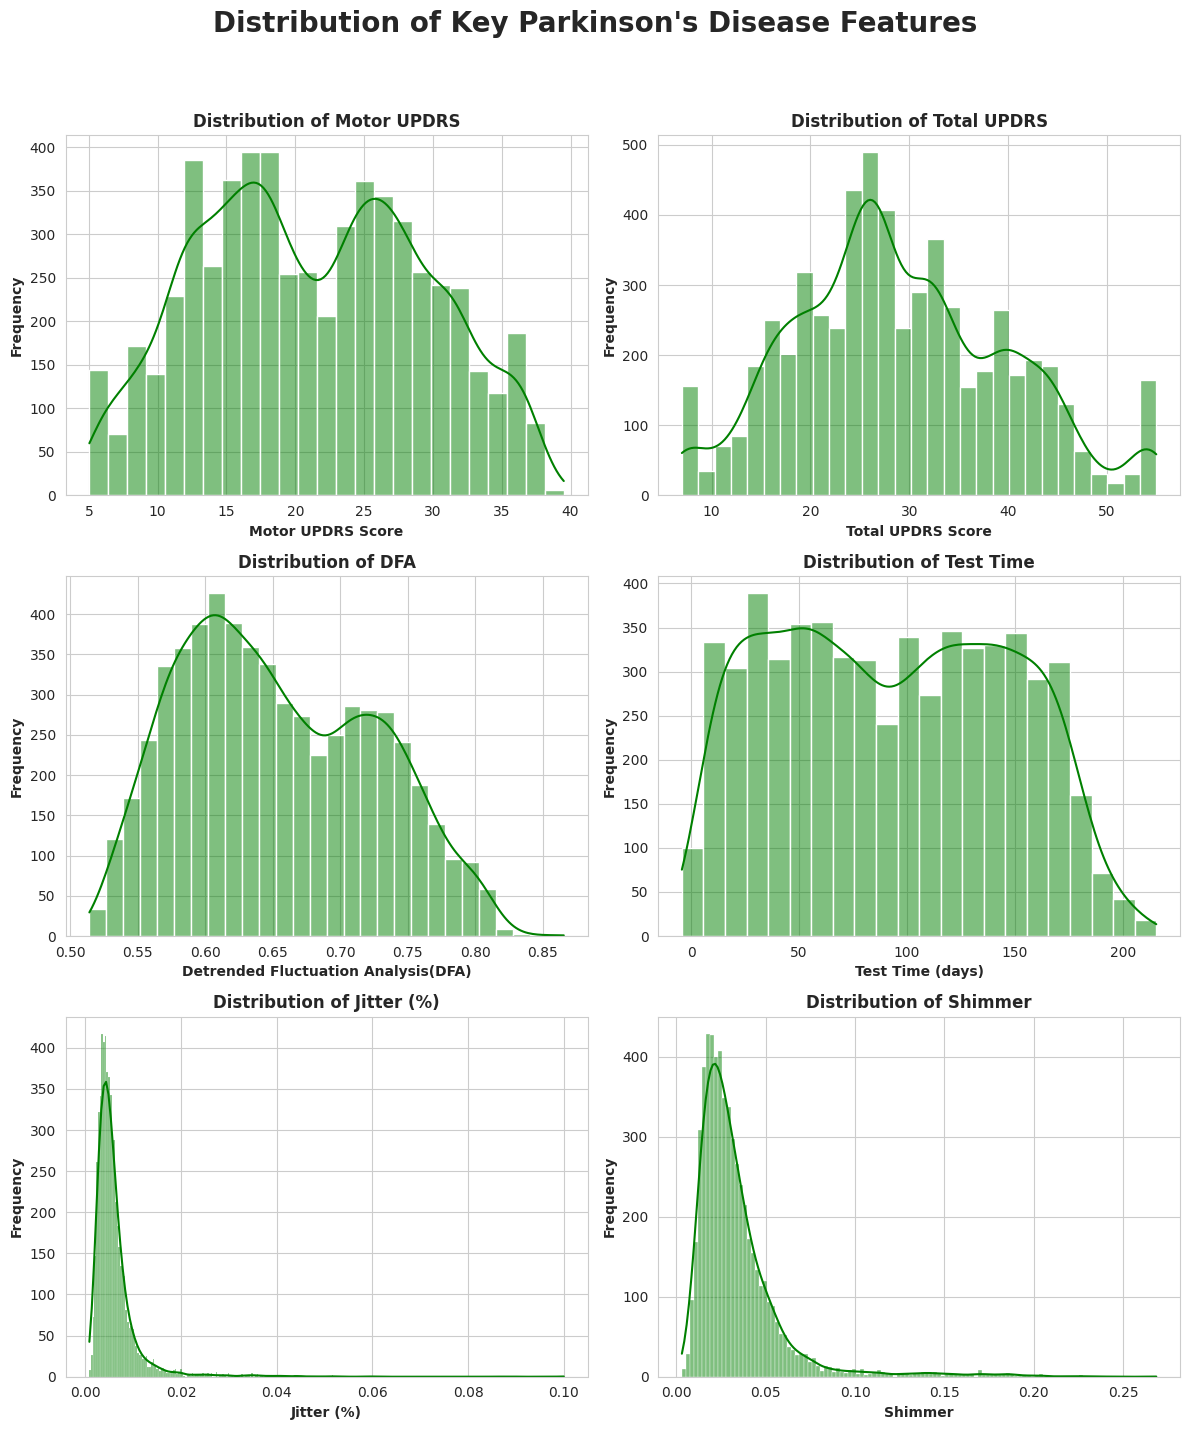

In [30]:
# Set the style for the plots to a visually appealing one
sns.set_style("whitegrid")

# Create a figure and a set of subplots with specified dimensions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
# Add a title to the entire figure
fig.suptitle('Distribution of Key Parkinson\'s Disease Features', weight='bold', fontsize=20)

# Create a histogram for 'motor_UPDRS' with a Kernel Density Estimate (KDE) line
sns.histplot(parkison_dis_data['motor_UPDRS'], kde=True, ax=axes[0, 0], color='green')
# Set the title, x-label, and y-label for the first subplot
axes[0, 0].set_title('Distribution of Motor UPDRS', weight='bold')
axes[0, 0].set_xlabel('Motor UPDRS Score', weight='bold')
axes[0, 0].set_ylabel('Frequency', weight='bold')

# Create a histogram for 'total_UPDRS' with KDE on the second subplot
sns.histplot(parkison_dis_data['total_UPDRS'], kde=True, ax=axes[0, 1], color='green')
# Set the title, x-label, and y-label for the second subplot
axes[0, 1].set_title('Distribution of Total UPDRS', weight='bold')
axes[0, 1].set_xlabel('Total UPDRS Score', weight='bold')
axes[0, 1].set_ylabel('Frequency', weight='bold')

# Create a histogram for 'age' with KDE on the third subplot
sns.histplot(parkison_dis_data['DFA'], kde=True, ax=axes[1, 0], color='green')
# Set the title, x-label, and y-label for the third subplot
axes[1, 0].set_title('Distribution of DFA', weight='bold')
axes[1, 0].set_xlabel('Detrended Fluctuation Analysis(DFA)', weight='bold')
axes[1, 0].set_ylabel('Frequency', weight='bold')

# Create a histogram for 'test_time' with KDE on the fourth subplot
sns.histplot(parkison_dis_data['test_time'], kde=True, ax=axes[1, 1], color='green')
# Set the title, x-label, and y-label for the fourth subplot
axes[1, 1].set_title('Distribution of Test Time', weight='bold')
axes[1, 1].set_xlabel('Test Time (days)', weight='bold')
axes[1, 1].set_ylabel('Frequency', weight='bold')

# Create a histogram for 'Jitter(%)' with KDE on the fifth subplot
sns.histplot(parkison_dis_data['Jitter(%)'], kde=True, ax=axes[2, 0], color='green')
# Set the title, x-label, and y-label for the fifth subplot
axes[2, 0].set_title('Distribution of Jitter (%)', weight='bold')
axes[2, 0].set_xlabel('Jitter (%)', weight='bold')
axes[2, 0].set_ylabel('Frequency', weight='bold')

# Create a histogram for 'Shimmer' with KDE on the sixth subplot
sns.histplot(parkison_dis_data['Shimmer'], kde=True, ax=axes[2, 1], color='green')
# Set the title, x-label, and y-label for the sixth subplot
axes[2, 1].set_title('Distribution of Shimmer', weight='bold')
axes[2, 1].set_xlabel('Shimmer', weight='bold')
axes[2, 1].set_ylabel('Frequency', weight='bold')

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Display the plots
plt.show()

**Observations:**
* The distributions of 'motor_UPDRS' and 'total_UPDRS' appear relatively spread out, indicating variability in disease severity among the subjects. The distribution of 'DFA' appears somewhat concentrated around a central value.
* 'Test_time' shows a distribution skewed towards lower values, suggesting more data points were collected earlier in the study period.
* Vocal features like 'Jitter(%)' and 'Shimmer' are heavily skewed towards lower values, indicating that while some subjects exhibit higher vocal variations, the majority have values closer to zero.

### **QUESTION 1: Are there specific vocal characteristics that are associated with the severity of Parkinson's disease symptoms?**

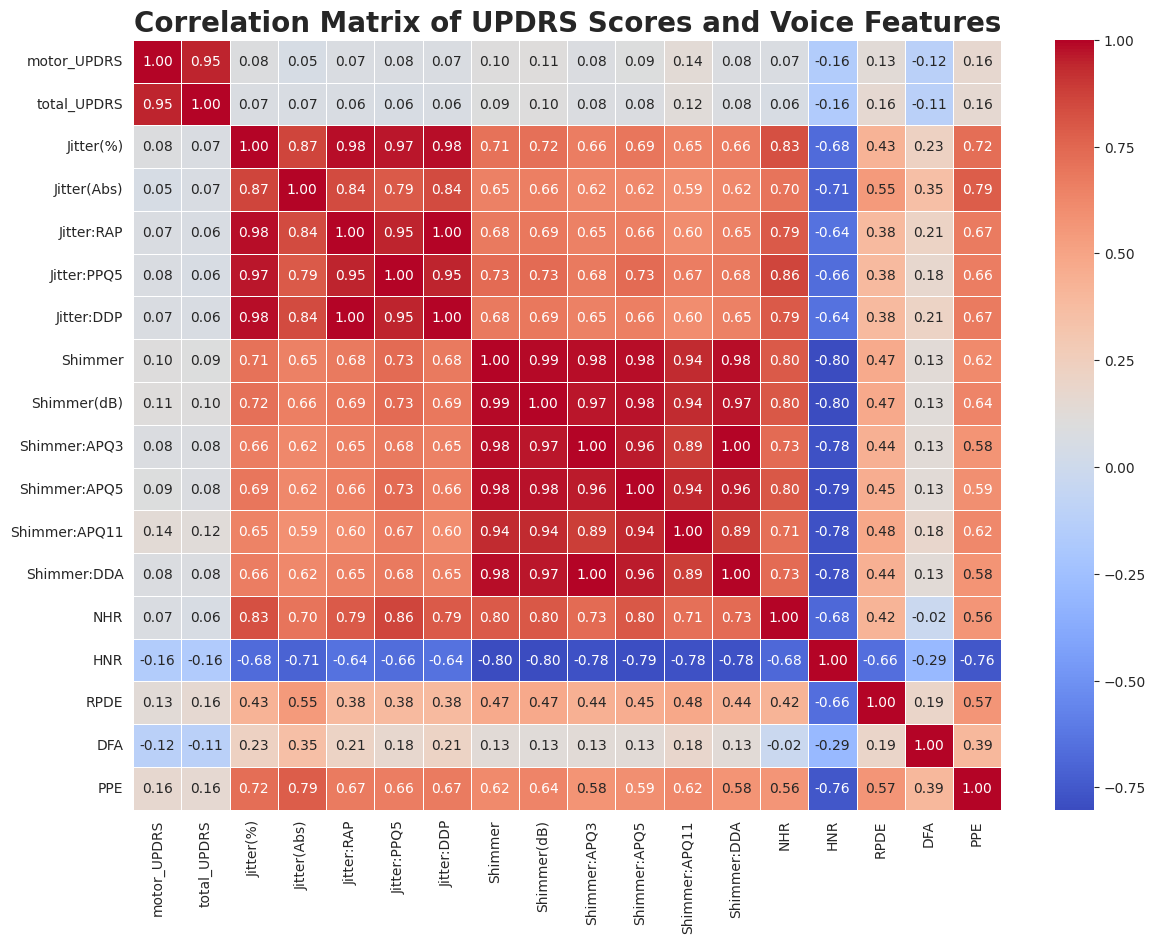

In [31]:
# Select the relevant columns for correlation analysis
# Include motor_UPDRS, total_UPDRS, and all voice features
voice_features = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
                  'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
                  'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
updrs_scores = ['motor_UPDRS', 'total_UPDRS']

correlation_cols = updrs_scores + voice_features

# Calculate the correlation matrix
correlation_matrix = parkison_dis_data[correlation_cols].corr()

# Display the correlation matrix (This is optional since heatmap is more visual)
# display(correlation_matrix)

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of UPDRS Scores and Voice Features', fontsize=20, weight='bold')
plt.show()

**Observations:**
* Several voice features, particularly those related to Jitter and Shimmer, show positive but relatively weak correlations with both motor_UPDRS and total_UPDRS scores (correlation coefficients generally below 0.2). This suggests a tendency for these vocal variations to increase slightly with higher disease severity, but the linear relationship is not strong.
* The HNR (Harmonics-to-Noise Ratio) feature shows a weak negative correlation with UPDRS scores (around -0.16). This indicates that as disease severity increases, the harmonics-to-noise ratio tends to slightly decrease.
* Features like RPDE and PPE show slightly stronger positive correlations with UPDRS scores (around 0.13 to 0.16) compared to most Jitter and Shimmer features, suggesting a somewhat more pronounced linear relationship with disease severity.

### **ANSWER 1:** Yes, the observations above indicate that there are associations between certain vocal characteristics and Parkinson's disease severity, as measured by UPDRS scores, but these linear relationships are generally weak.

---



### **QUESTION 2: Which voice features show the strongest linear relationship with motor and total UPDRS scores?**

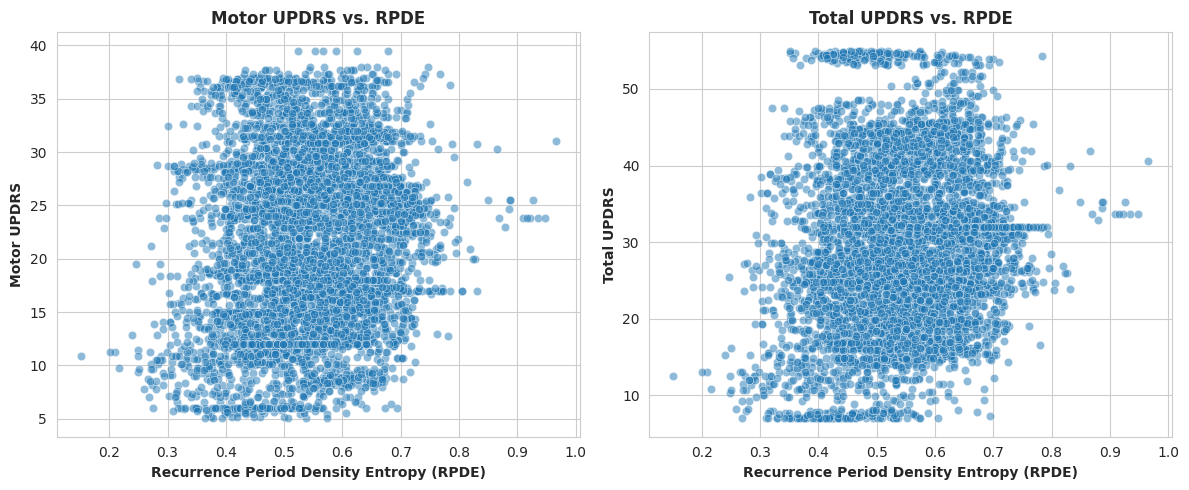

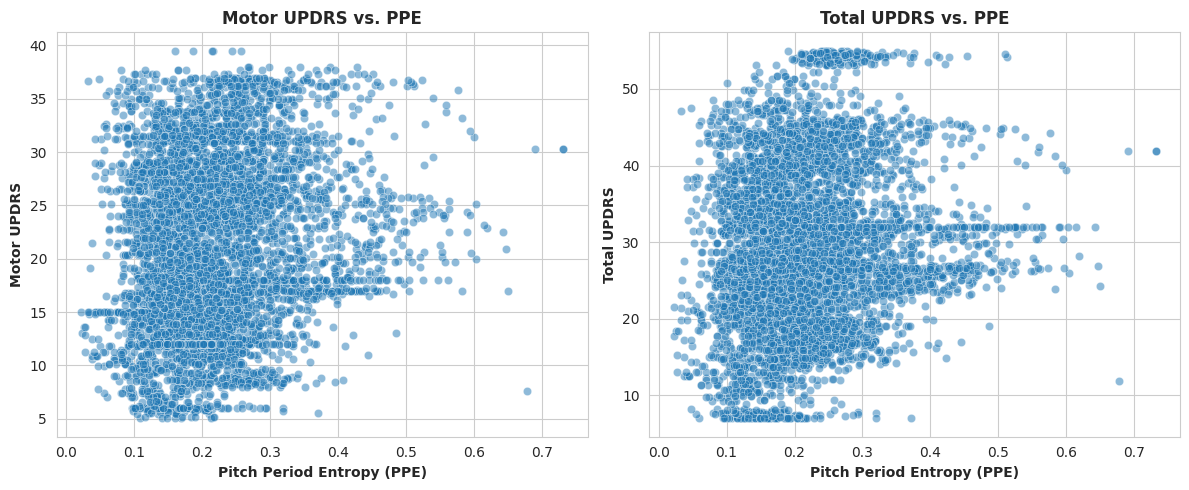

In [33]:
# Create scatter plots for selected voice features against UPDRS scores

# RPDE vs UPDRS scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=parkison_dis_data, x='RPDE', y='motor_UPDRS', alpha=0.5)
plt.title('Motor UPDRS vs. RPDE', weight='bold')
plt.xlabel('Recurrence Period Density Entropy (RPDE)', weight='bold')
plt.ylabel('Motor UPDRS', weight='bold')

plt.subplot(1, 2, 2)
sns.scatterplot(data=parkison_dis_data, x='RPDE', y='total_UPDRS', alpha=0.5)
plt.title('Total UPDRS vs. RPDE', weight='bold')
plt.xlabel('Recurrence Period Density Entropy (RPDE)', weight='bold')
plt.ylabel('Total UPDRS', weight='bold')

plt.tight_layout()
plt.show()


# PPE vs UPDRS scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=parkison_dis_data, x='PPE', y='motor_UPDRS', alpha=0.5)
plt.title('Motor UPDRS vs. PPE', weight='bold')
plt.xlabel('Pitch Period Entropy (PPE)', weight='bold')
plt.ylabel('Motor UPDRS', weight='bold')

plt.subplot(1, 2, 2)
sns.scatterplot(data=parkison_dis_data, x='PPE', y='total_UPDRS', alpha=0.5)
plt.title('Total UPDRS vs. PPE', weight='bold')
plt.xlabel('Pitch Period Entropy (PPE)', weight='bold')
plt.ylabel('Total UPDRS', weight='bold')

plt.tight_layout()
plt.show()

**Observations:**
* The scatter plots for RPDE and PPE against both motor_UPDRS and total_UPDRS show a general upward trend, visually confirming the positive correlations we observed in the heatmap.
* However, the points in the scatter plots are quite dispersed, rather than tightly clustered around a line. This visual dispersion reinforces the earlier finding that the linear relationships, while present, are relatively weak.
* There doesn't appear to be a perfectly linear relationship; the spread of UPDRS scores varies somewhat across the range of RPDE and PPE values.

### **ANSWER 2:** Based on correlation analysis and scatter plots, Recurrence Period Density Entropy (RPDE) and Pitch Period Entropy (PPE) show the slightly strongest, though still relatively weak, positive linear relationships with motor and total UPDRS scores among the voice features.

---



### **QUESTION 3: Do any of the voice features appear to be potential indicators or predictors of Parkinson's disease severity?**

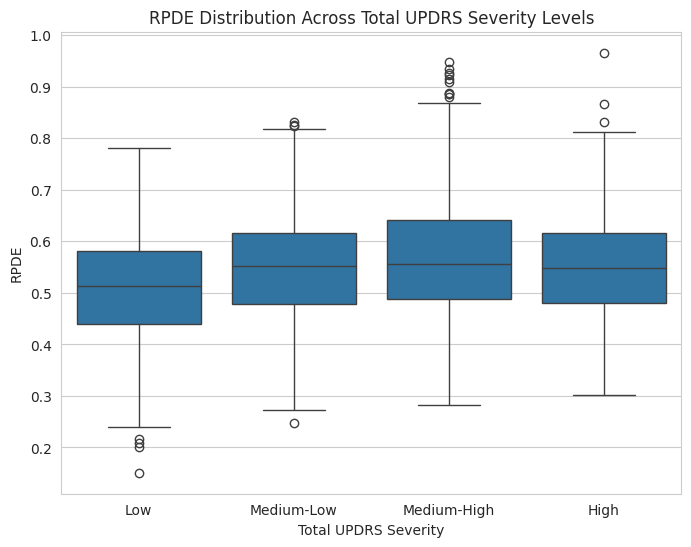

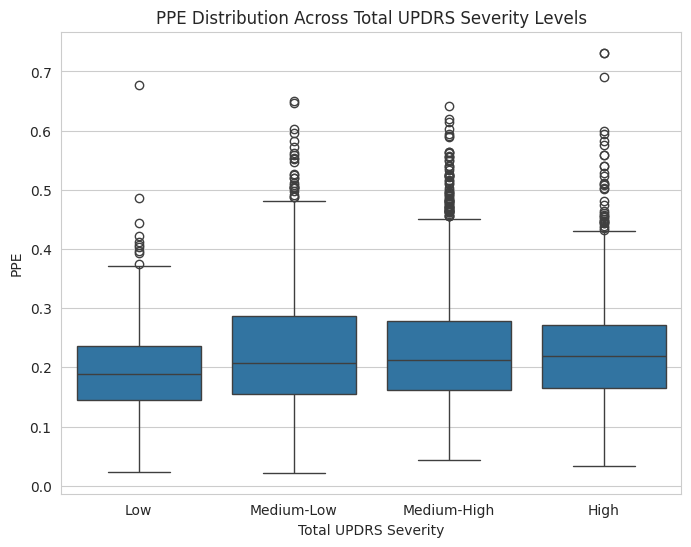

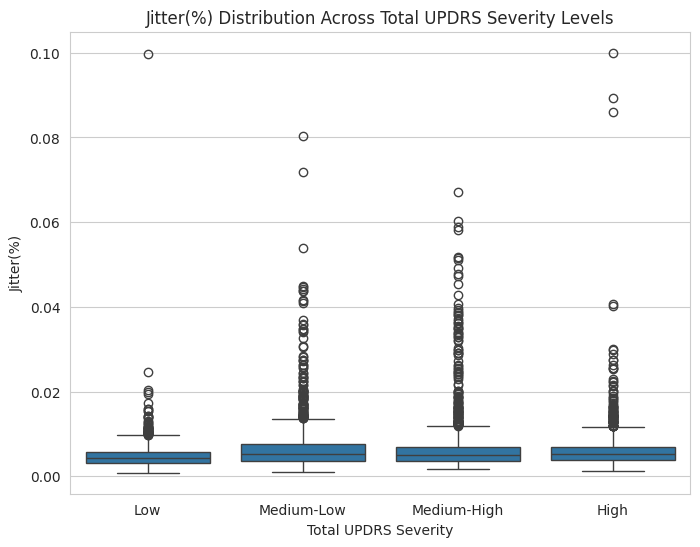

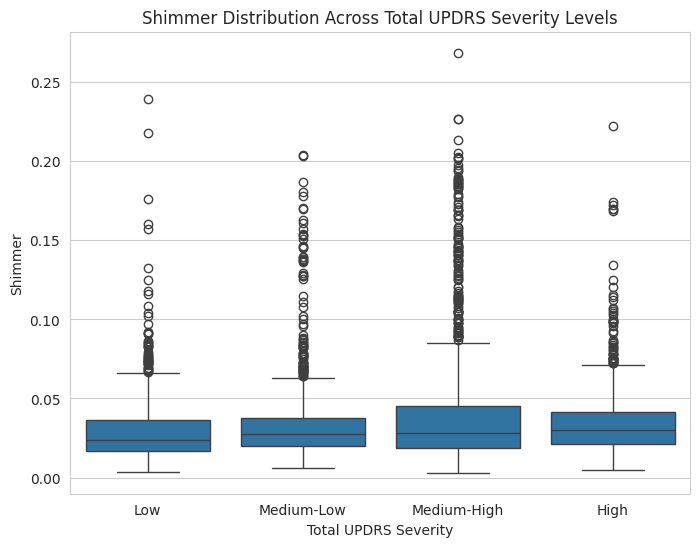

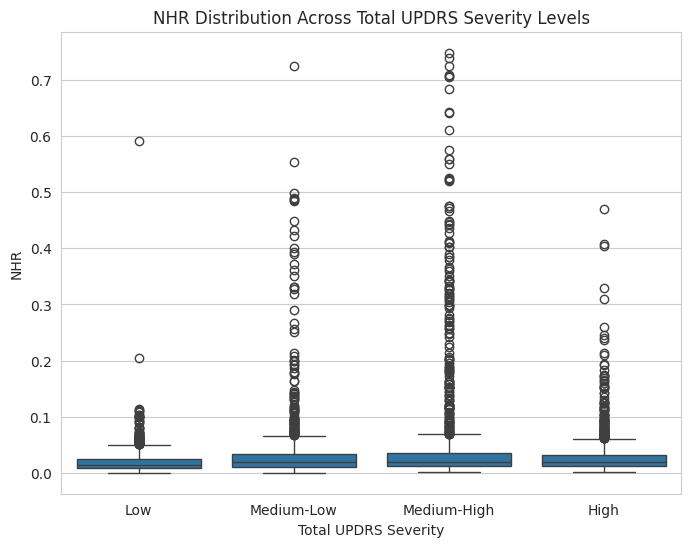

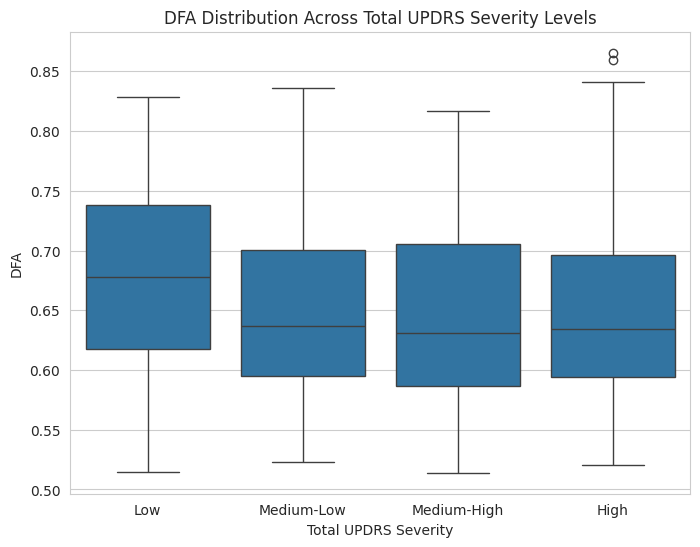

In [34]:
# Categorize total_UPDRS into quartiles for severity levels
parkison_dis_data['UPDRS_Severity'] = pd.qcut(parkison_dis_data['total_UPDRS'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create box plots for key voice features across UPDRS severity levels

# RPDE vs UPDRS Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='UPDRS_Severity', y='RPDE')
plt.title('RPDE Distribution Across Total UPDRS Severity Levels')
plt.xlabel('Total UPDRS Severity')
plt.ylabel('RPDE')
plt.show()

# PPE vs UPDRS Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='UPDRS_Severity', y='PPE')
plt.title('PPE Distribution Across Total UPDRS Severity Levels')
plt.xlabel('Total UPDRS Severity')
plt.ylabel('PPE')
plt.show()

# Jitter(%) vs UPDRS Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='UPDRS_Severity', y='Jitter(%)')
plt.title('Jitter(%) Distribution Across Total UPDRS Severity Levels')
plt.xlabel('Total UPDRS Severity')
plt.ylabel('Jitter(%)')
plt.show()

# Shimmer vs UPDRS Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='UPDRS_Severity', y='Shimmer')
plt.title('Shimmer Distribution Across Total UPDRS Severity Levels')
plt.xlabel('Total UPDRS Severity')
plt.ylabel('Shimmer')
plt.show()

# NHR vs UPDRS Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='UPDRS_Severity', y='NHR')
plt.title('NHR Distribution Across Total UPDRS Severity Levels')
plt.xlabel('Total UPDRS Severity')
plt.ylabel('NHR')
plt.show()

# DFA vs UPDRS Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='UPDRS_Severity', y='DFA')
plt.title('DFA Distribution Across Total UPDRS Severity Levels')
plt.xlabel('Total UPDRS Severity')
plt.ylabel('DFA')
plt.show()

**Observations:**
* For RPDE and PPE, there appears to be a general upward trend in the median and the overall distribution as the Total UPDRS Severity level increases from 'Low' to 'High', suggesting these features tend to be higher in individuals with more severe Parkinson's symptoms.
* The box plots for Jitter(%) and Shimmer show that the majority of data points are clustered near zero across all severity levels. While there are outliers, the central distribution (box and whiskers) does not show a clear, consistent increase with severity in these plots.
* The distributions of NHR and DFA across the UPDRS severity levels appear less distinct in these box plots compared to RPDE and PPE, with overlapping ranges and less apparent trends in the median values across the severity categories.

### **ANSWER 3:**  The insights from the box plots across severity levels reinforce the findings from correlation analysis and scatter plots: Recurrence Period Density Entropy (RPDE) and Pitch Period Entropy (PPE) appear to be the most promising voice features among those examined as potential indicators of Parkinson's disease severity, showing a discernible association with higher UPDRS scores by exhibiting higher values in more severe groups.

---



### **QUESTION 4: How do motor and total UPDRS scores change over time for individual subjects?**

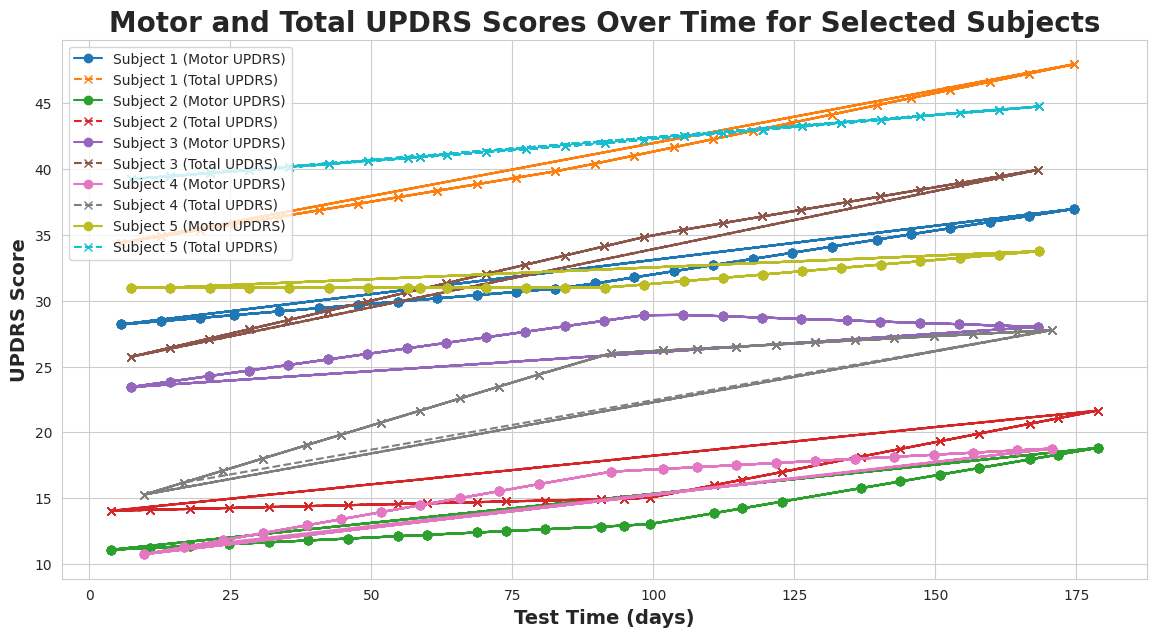

In [37]:
# Get a list of unique subject IDs
subject_ids = parkison_dis_data['subject#'].unique()

# Select a few subjects to visualize (e.g., the first 5 unique subjects)
selected_subjects = subject_ids[:5]

# Create line plots for motor_UPDRS and total_UPDRS over test_time for selected subjects
plt.figure(figsize=(14, 7))

for subject_id in selected_subjects:
    subject_data = parkison_dis_data[parkison_dis_data['subject#'] == subject_id]
    plt.plot(subject_data['test_time'], subject_data['motor_UPDRS'], marker='o', linestyle='-', label=f'Subject {subject_id} (Motor UPDRS)')
    plt.plot(subject_data['test_time'], subject_data['total_UPDRS'], marker='x', linestyle='--', label=f'Subject {subject_id} (Total UPDRS)')

plt.title('Motor and Total UPDRS Scores Over Time for Selected Subjects', fontsize=20, weight = "bold")
plt.xlabel('Test Time (days)', fontsize=14, weight = "bold")
plt.ylabel('UPDRS Score', fontsize=14, weight = "bold")
plt.legend()
plt.grid(True)
plt.show()

**Observations:**
* For the selected subjects, there appears to be a general upward trend in both motor_UPDRS and total_UPDRS scores over test_time, suggesting a progression of Parkinson's disease symptoms over the study period.
* The rate of progression (the steepness of the lines) seems to vary between individual subjects, indicating heterogeneity in how quickly the disease is progressing among these individuals.
* In most cases, the total_UPDRS score is consistently higher than the motor_UPDRS score for the same subject at a given test time, which is expected as the total score includes non-motor symptoms in addition to motor ones.

### **ANSWER 4:**  The line plots of motor and total UPDRS scores over time for individual subjects generally show an upward trend, indicating a progression of Parkinson's disease symptoms throughout the study period. There is notable variability in the rate of this progression across different subjects.

---



### **QUESTION 5: Do key voice features show a discernible trend (increase or decrease) over time within individual subjects?**


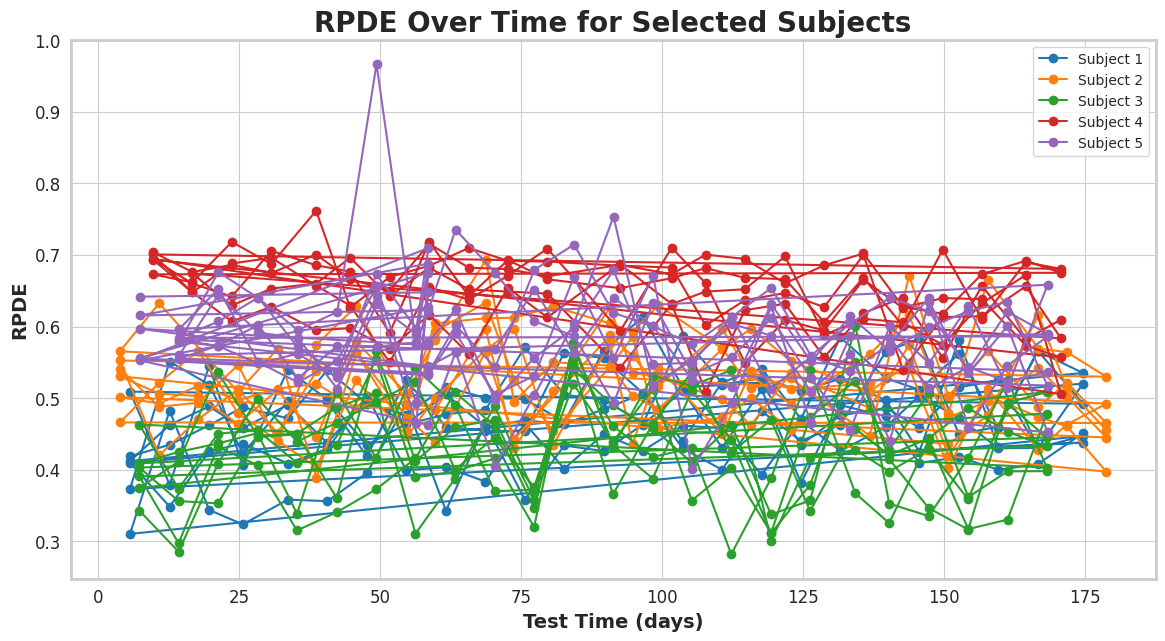

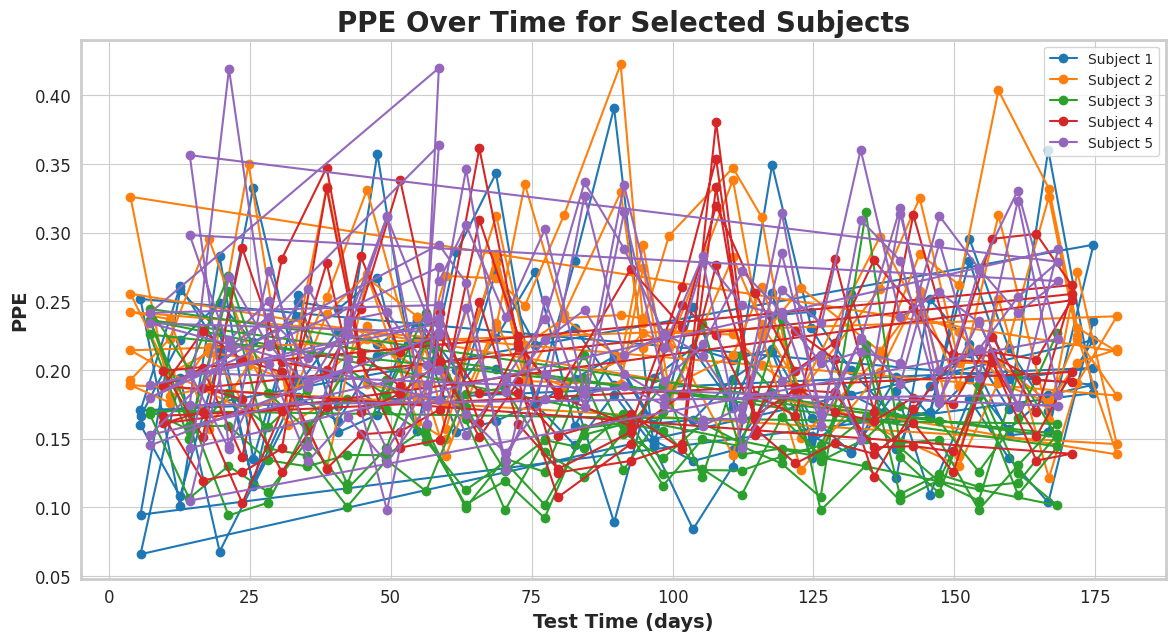

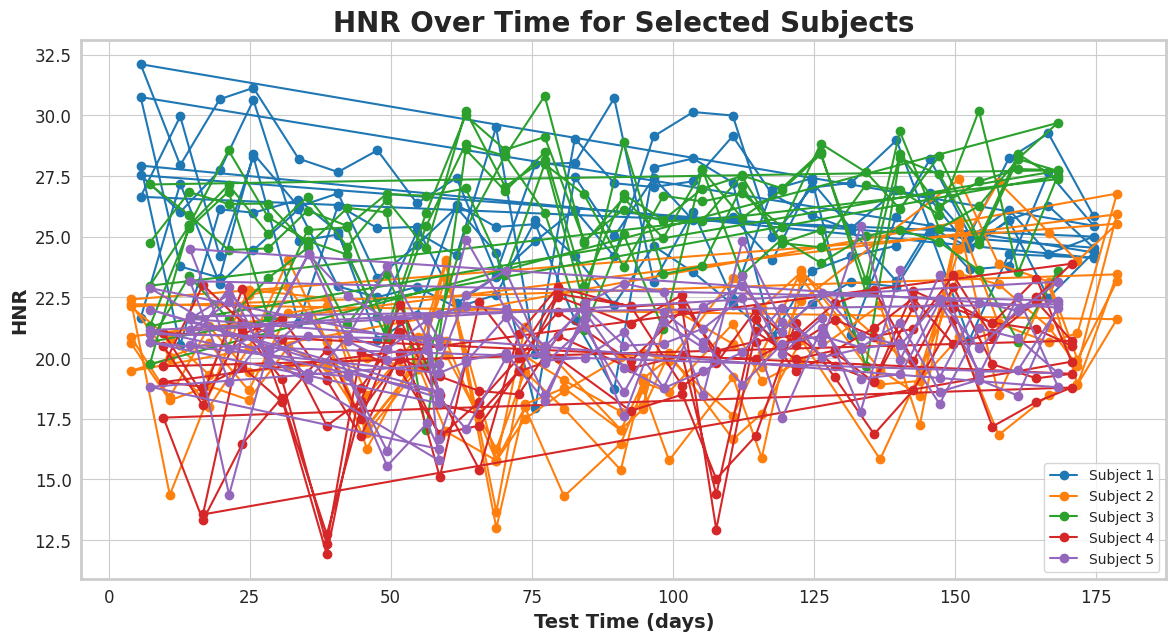

In [38]:
# Select the same few subjects as before for consistency
selected_subjects = parkison_dis_data['subject#'].unique()[:5]

# Define the key voice features to plot
key_voice_features = ['RPDE', 'PPE', 'HNR']

# Create line plots for key voice features over test_time for selected subjects
for feature in key_voice_features:
    plt.figure(figsize=(14, 7))
    for subject_id in selected_subjects:
        subject_data = parkison_dis_data[parkison_dis_data['subject#'] == subject_id]
        plt.plot(subject_data['test_time'], subject_data[feature], marker='o', linestyle='-', label=f'Subject {subject_id}')

    plt.title(f'{feature} Over Time for Selected Subjects', weight='bold', fontsize=20)
    plt.xlabel('Test Time (days)', weight='bold', fontsize=14)
    plt.ylabel(feature, weight='bold', fontsize=14)
    plt.legend()
    plt.grid(True)
    # Make the plot border bold
    ax = plt.gca() # Get the current axes
    for spine in ax.spines.values():
        spine.set_linewidth(2) # Set line width for border
    # Increase font size of numbers on axes
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

**Observations:**
* The line plots for RPDE, PPE, and HNR over test_time show considerable variability within individual subjects, with fluctuations rather than strong, consistent upward or downward trends across all selected individuals.
* Unlike the general upward trend observed in UPDRS scores, these specific voice features do not exhibit a clear, uniform pattern of change over time across the visualized subjects.
* The trajectories for each voice feature appear to be highly individual-specific, highlighting the heterogeneity in how vocal characteristics might change (or not change significantly) over the study period for different people with Parkinson's disease.

### **ANSWER 5:**  The line plots of key voice features over time for individual subjects do not show a clear, consistent trend (increase or decrease) across all visualized subjects; the changes appear highly variable and individual-specific.

---



### **QUESTION 6: Is there significant variability in the rate of UPDRS score change or voice feature change across different subjects?**


Statistics of Total UPDRS Slopes Across Subjects:


count    42.000000
mean      0.018749
std       0.043466
min      -0.094417
25%      -0.004251
50%       0.023435
75%       0.045099
max       0.092432
Name: total_updrs_slope, dtype: float64

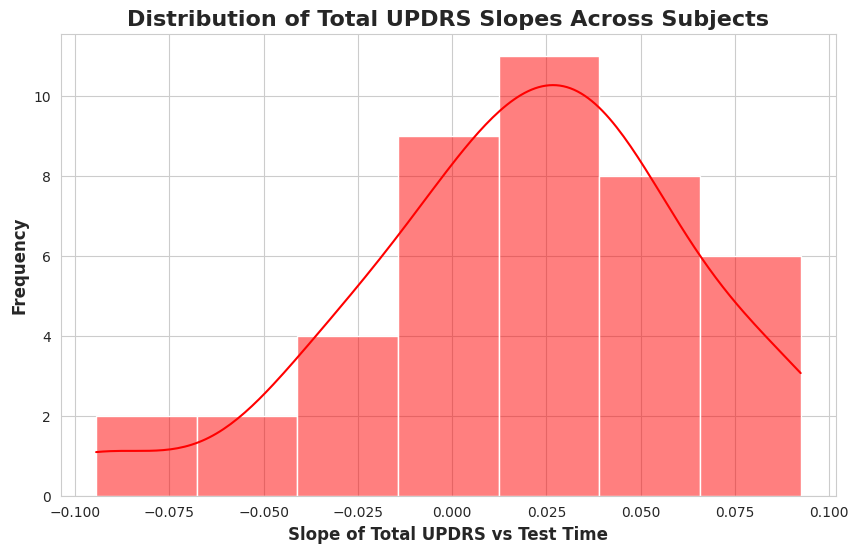

In [42]:
from scipy.stats import linregress

# Get a list of unique subject IDs
subject_ids = parkison_dis_data['subject#'].unique()

# List to store the calculated slopes
updrs_slopes = []

# Calculate the slope of total_UPDRS vs test_time for each subject
for subject_id in subject_ids:
    subject_data = parkison_dis_data[parkison_dis_data['subject#'] == subject_id].sort_values(by='test_time')

    # Ensure there is enough data to perform regression (at least 2 points)
    if len(subject_data) > 1:
        # Perform linear regression: total_UPDRS ~ test_time
        slope, intercept, r_value, p_value, std_err = linregress(subject_data['test_time'], subject_data['total_UPDRS'])
        updrs_slopes.append({'subject#': subject_id, 'total_updrs_slope': slope})

# Convert the list of slopes to a DataFrame
updrs_slopes_df = pd.DataFrame(updrs_slopes)

# Display basic statistics of the slopes
print("Statistics of Total UPDRS Slopes Across Subjects:")
display(updrs_slopes_df['total_updrs_slope'].describe())

# Visualize the distribution of the slopes
plt.figure(figsize=(10, 6))
sns.histplot(updrs_slopes_df['total_updrs_slope'], kde=True, color="red")
plt.title('Distribution of Total UPDRS Slopes Across Subjects', weight='bold', fontsize=16)
plt.xlabel('Slope of Total UPDRS vs Test Time', weight='bold', fontsize=12)
plt.ylabel('Frequency', weight='bold', fontsize=12)
plt.grid(True)
plt.show()

**Observations:**
* The descriptive statistics and histogram of the total_updrs_slope show a range of values (from a minimum of -0.094 to a maximum of 0.092), with a mean slope of 0.0187. This confirms that there is significant variability in the rate of change of Total UPDRS scores across different subjects.
* The standard deviation of the slopes (0.043) is relatively large compared to the mean, further highlighting the substantial differences in individual disease progression rates.
* While the majority of subjects show a positive slope (indicating increasing UPDRS scores over time), the presence of negative slopes for some subjects suggests that their Total UPDRS scores either decreased or remained relatively stable during the study period, indicating diverse progression patterns.

### **ANSWER 6:**  Yes, the analysis of the calculated Total UPDRS slopes confirms significant variability in the rate of disease progression across different subjects, with slopes ranging from negative to positive values.

---



### **QUESTION 7: How do demographic factors (age, sex) relate to the baseline UPDRS scores or the rate of progression over time?**

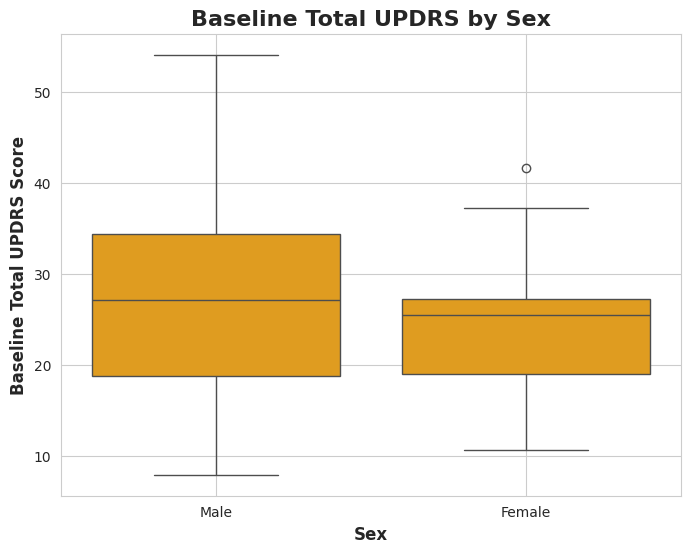

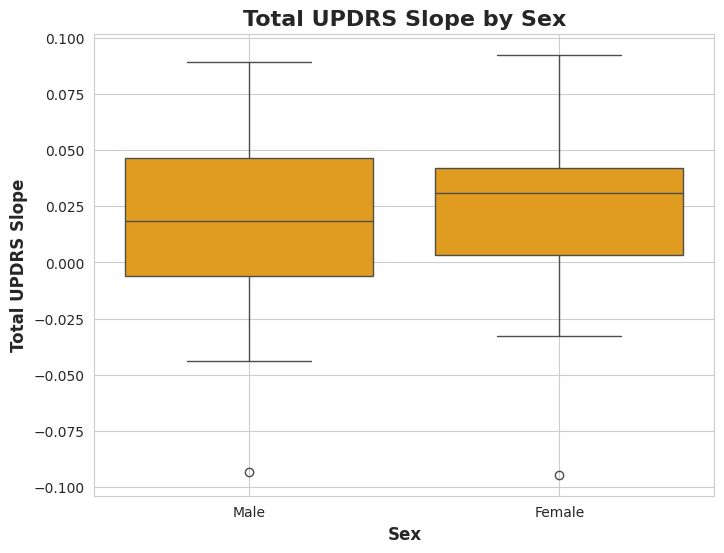

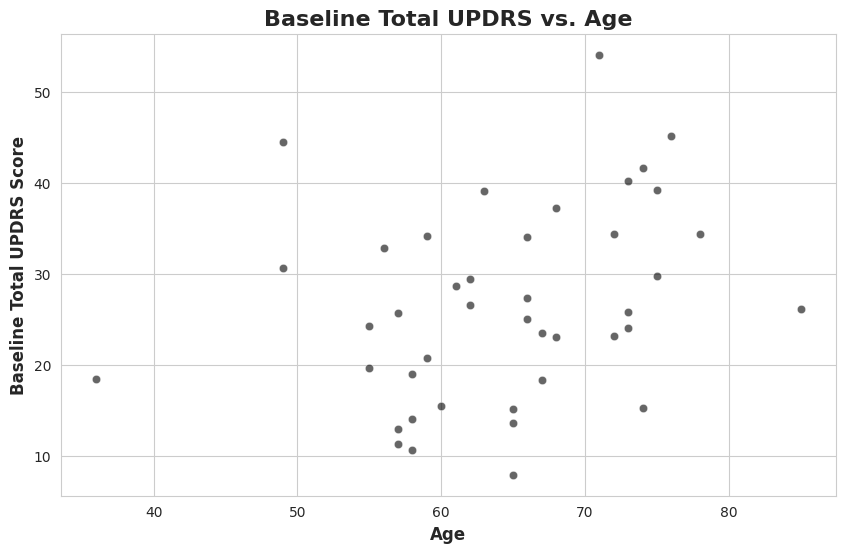

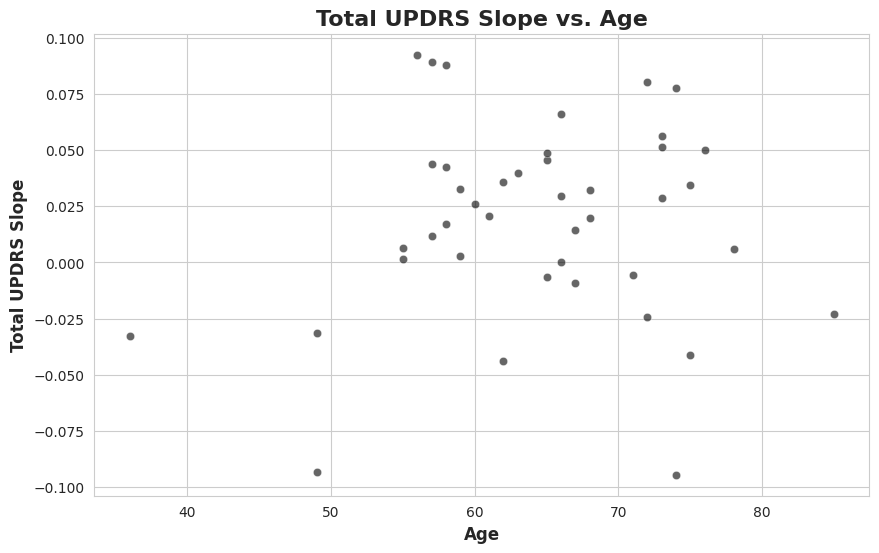

In [41]:
# Determine baseline total UPDRS score for each subject (earliest test_time)
baseline_data = parkison_dis_data.loc[parkison_dis_data.groupby('subject#')['test_time'].idxmin()]

# Merge with the calculated slopes
baseline_progression_data = pd.merge(baseline_data[['subject#', 'sex', 'age', 'total_UPDRS']],
                                      updrs_slopes_df,
                                      on='subject#',
                                      how='left')

# Rename baseline total_UPDRS for clarity
baseline_progression_data.rename(columns={'total_UPDRS': 'baseline_total_UPDRS'}, inplace=True)

# Convert sex to a categorical label for plotting
baseline_progression_data['sex_label'] = baseline_progression_data['sex'].map({0: 'Male', 1: 'Female'})

# Compare baseline total UPDRS by sex using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=baseline_progression_data, x='sex_label', y='baseline_total_UPDRS', color='orange')
plt.title('Baseline Total UPDRS by Sex', weight='bold', fontsize=16)
plt.xlabel('Sex', weight='bold', fontsize=12)
plt.ylabel('Baseline Total UPDRS Score', weight='bold', fontsize=12)
plt.grid(True)
plt.show()

# Compare Total UPDRS slopes by sex using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=baseline_progression_data, x='sex_label', y='total_updrs_slope', color='orange')
plt.title('Total UPDRS Slope by Sex', weight='bold', fontsize=16)
plt.xlabel('Sex', weight='bold', fontsize=12)
plt.ylabel('Total UPDRS Slope', weight='bold', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot of baseline total UPDRS vs. age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=baseline_progression_data, x='age', y='baseline_total_UPDRS', alpha=0.6, color='black')
plt.title('Baseline Total UPDRS vs. Age', weight='bold', fontsize=16)
plt.xlabel('Age', weight='bold', fontsize=12)
plt.ylabel('Baseline Total UPDRS Score', weight='bold', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot of total UPDRS slope vs. age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=baseline_progression_data, x='age', y='total_updrs_slope', alpha=0.6, color='black')
plt.title('Total UPDRS Slope vs. Age', weight='bold', fontsize=16)
plt.xlabel('Age', weight='bold', fontsize=12)
plt.ylabel('Total UPDRS Slope', weight='bold', fontsize=12)
plt.grid(True)
plt.show()

**Observations:**
* The box plots comparing baseline Total UPDRS scores and Total UPDRS slopes by sex do not show substantial differences in the median or distribution between male and female subjects in this dataset.
* The scatter plot of baseline Total UPDRS vs. age does not reveal a clear linear trend, suggesting that baseline disease severity is not strongly correlated with age in this cohort.
* Similarly, the scatter plot of Total UPDRS slope vs. age does not show a distinct pattern or strong correlation, indicating that the rate of disease progression, as measured by the calculated slope, is not strongly associated with age in this dataset.

### **ANSWER 7:**  Based on the EDA comparing baseline UPDRS scores and progression slopes across age and sex, there does not appear to be a strong relationship between these demographic factors and either baseline disease severity or the rate of progression in this dataset.

---



### **QUESTION 8: Is there a relationship between the initial severity of Parkinson's disease (e.g., baseline UPDRS score) and the rate at which UPDRS scores or voice features change over time?**

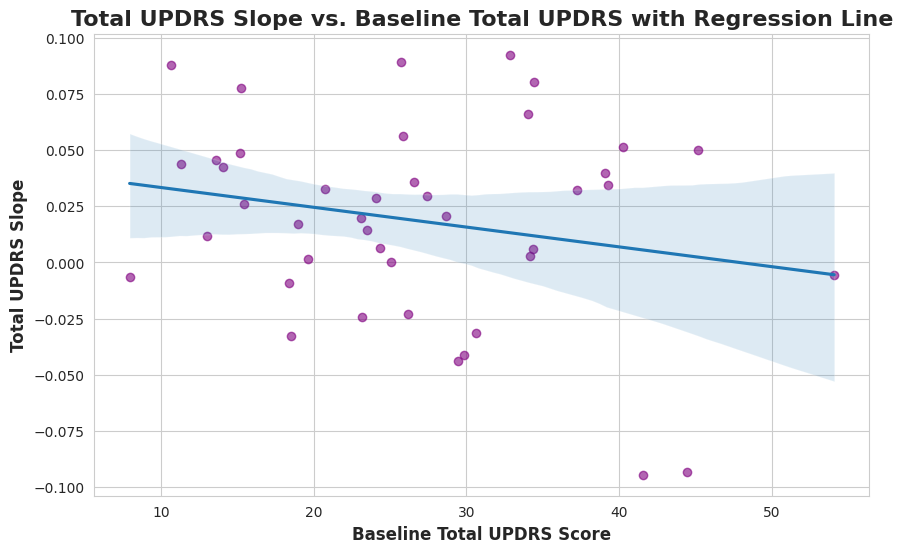

In [44]:
# Scatter plot of baseline total UPDRS vs. total UPDRS slope with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=baseline_progression_data, x='baseline_total_UPDRS', y='total_updrs_slope', scatter_kws={'alpha':0.6, 'color':'purple'})
plt.title('Total UPDRS Slope vs. Baseline Total UPDRS with Regression Line', weight='bold', fontsize=16)
plt.xlabel('Baseline Total UPDRS Score', weight='bold', fontsize=12)
plt.ylabel('Total UPDRS Slope', weight='bold', fontsize=12)
plt.grid(True)
plt.show()

**Observations:**
* The scatter plot of total_updrs_slope versus baseline_total_UPDRS does not show a strong linear relationship; the points are quite scattered.
* The regression line appears relatively flat or shows only a very slight trend, suggesting that there is not a strong tendency for individuals with higher baseline UPDRS scores to have significantly steeper (or shallower) progression slopes in this dataset.
* There is considerable variability in progression slopes across the range of baseline UPDRS scores, indicating that initial disease severity alone does not appear to be a strong predictor of how quickly the disease will progress over the study period for individual subjects in this cohort.

### **ANSWER 8:**  Considering the scatter plot of Total UPDRS slope versus baseline Total UPDRS, it is clear that there does not appear to be a strong linear relationship between initial disease severity and the rate of progression in this dataset.

---



### **QUESTION 9: Are there differences in the distribution of motor and total UPDRS scores between male and female subjects?**

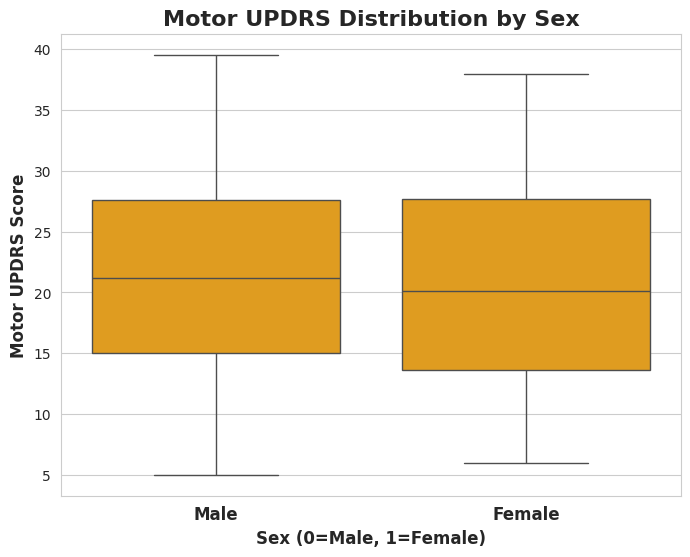

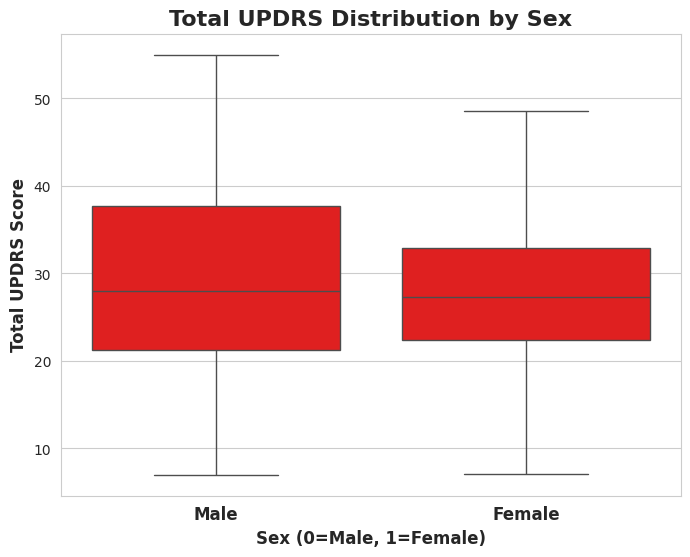

In [46]:
# Compare the distribution of motor_UPDRS by sex using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='sex', y='motor_UPDRS', color='orange')
plt.title('Motor UPDRS Distribution by Sex', weight='bold', fontsize=16)
plt.xlabel('Sex (0=Male, 1=Female)', weight='bold', fontsize=12)
plt.ylabel('Motor UPDRS Score', weight='bold', fontsize=12)
plt.xticks([0, 1], ['Male', 'Female'], weight='bold', fontsize=12) # Label the x-axis ticks and make them bold
plt.show()

# Compare the distribution of total_UPDRS by sex using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=parkison_dis_data, x='sex', y='total_UPDRS', color='red')
plt.title('Total UPDRS Distribution by Sex', weight='bold', fontsize=16)
plt.xlabel('Sex (0=Male, 1=Female)', weight='bold', fontsize=12)
plt.ylabel('Total UPDRS Score', weight='bold', fontsize=12)
plt.xticks([0, 1], ['Male', 'Female'], weight='bold', fontsize=12) # Label the x-axis ticks and make them bold
plt.show()

**Observations:**
* The box plots for both motor_UPDRS and total_UPDRS show that the median scores for male and female subjects appear to be quite similar in this dataset.
* The interquartile range (the box) and the overall spread of the data (whiskers and potential outliers) for both motor_UPDRS and total_UPDRS also appear comparable between the two sex categories.
* There does not seem to be a visually striking difference in the distribution of either motor or total UPDRS scores between male and female subjects based on these box plots.

### **ANSWER 9:**  There is no significant differences in the distribution of motor or total UPDRS scores between male and female subjects in this dataset, as shown in the boxplots.

---



**ANSWER 9:** Based on the box plots,

### **QUESTION 10: Are there differences in the distribution of key voice features between male and female subjects?**

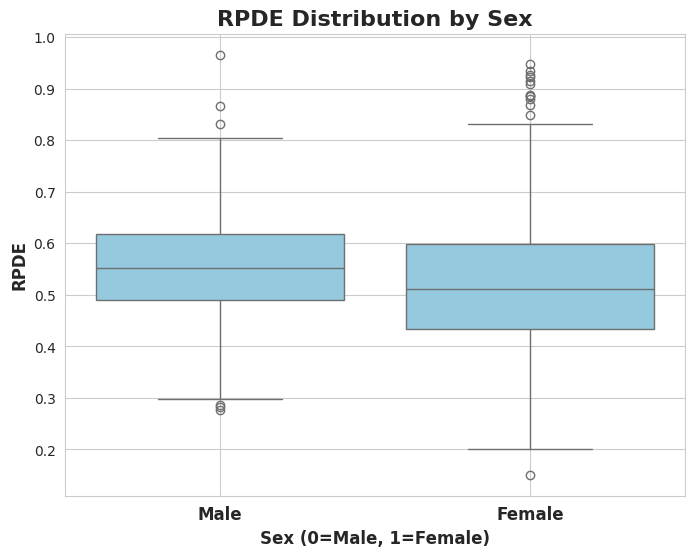

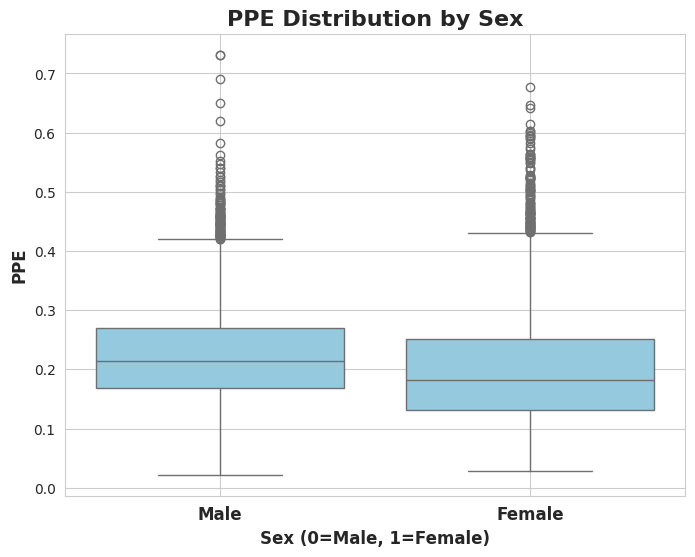

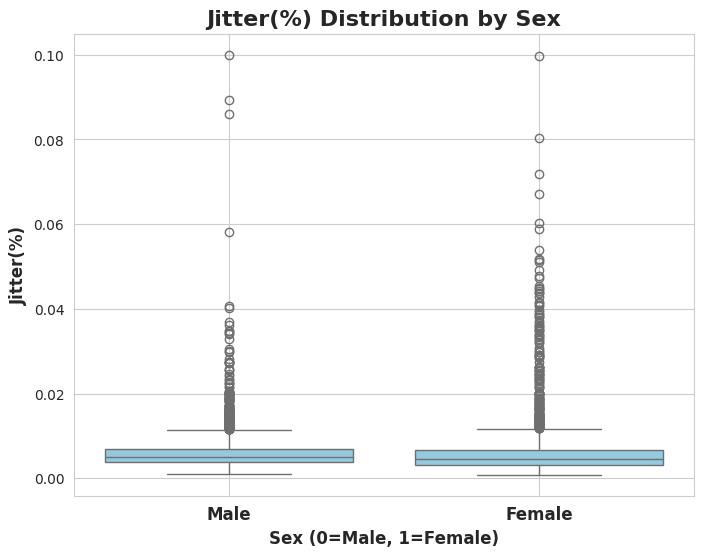

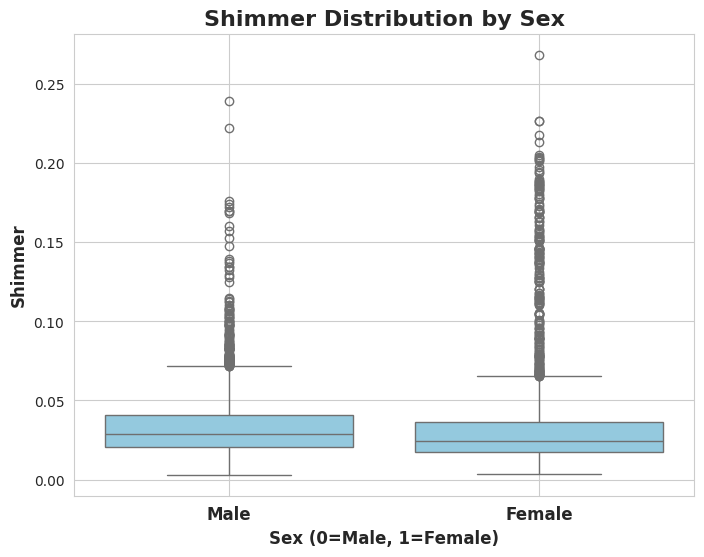

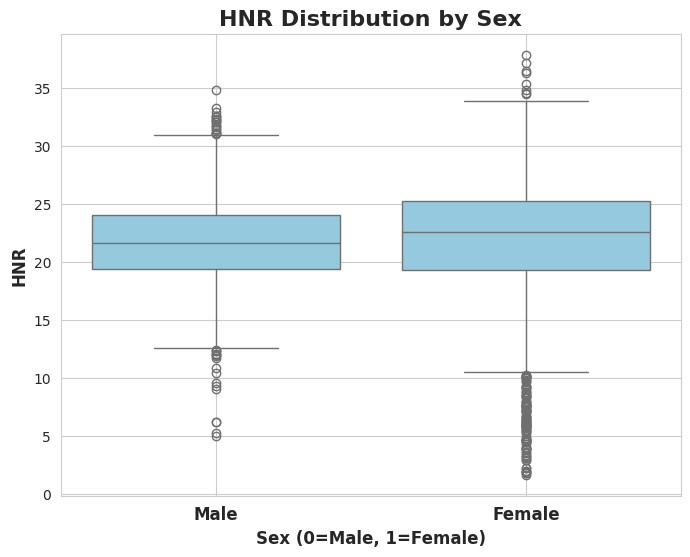

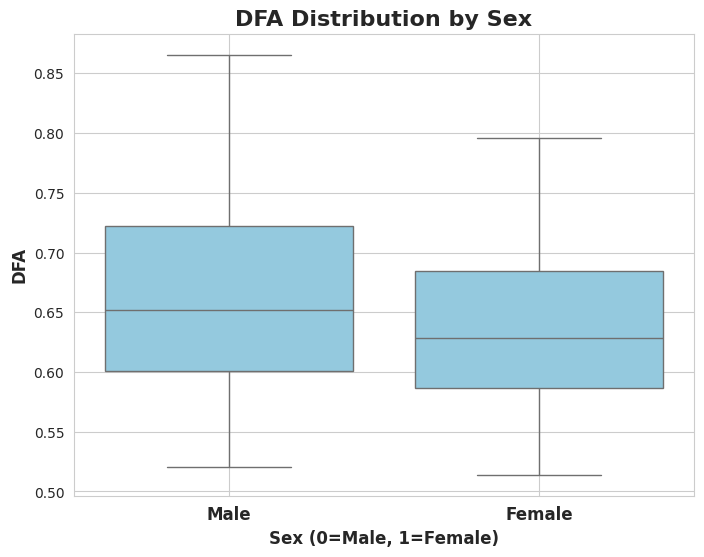

In [47]:
# Define a list of key voice features to compare by sex
key_voice_features_to_compare = ['RPDE', 'PPE', 'Jitter(%)', 'Shimmer', 'HNR', 'DFA']

# Create box plots for each key voice feature comparing distributions by sex
for feature in key_voice_features_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=parkison_dis_data, x='sex', y=feature, color='skyblue')
    plt.title(f'{feature} Distribution by Sex', weight='bold', fontsize=16)
    plt.xlabel('Sex (0=Male, 1=Female)', weight='bold', fontsize=12)
    plt.ylabel(feature, weight='bold', fontsize=12)
    plt.xticks([0, 1], ['Male', 'Female'], weight='bold', fontsize=12)
    plt.grid(True)
    plt.show()

**Observations:**
* For most voice features, including RPDE, PPE, Jitter(%), and Shimmer, the box plots show considerable overlap in the distributions between male and female subjects, suggesting no large differences in their median values or interquartile ranges based on sex.
* The HNR (Harmonics-to-Noise Ratio) plot shows a noticeable difference in distribution between sexes, with males (0) tending to have a higher median and overall range of HNR values compared to females (1) in this dataset.
* The distribution of DFA also appears somewhat different between sexes, with males potentially showing a slightly lower median and different spread compared to females.

### **ANSWER 10:** Based on the box plots comparing key voice feature distributions by sex, HNR and DFA show some noticeable differences between male and female subjects, while features like RPDE, PPE, Jitter(%), and Shimmer show considerable overlap in their distributions.

---



## **Key Findings**

The exploratory data analysis of the Parkinson's disease telemonitoring dataset has yielded several key insights, painting a detailed picture of the data's structure, feature characteristics, and preliminary relationships:

*   **Data Landscape:** The dataset, comprising 5,875 voice recordings from 42 subjects, provides a rich source of longitudinal data with no missing values. Initial inspection highlighted the range and variability within clinical scores (UPDRS) and vocal features, with many voice parameters exhibiting distributions skewed towards lower values. The test time distribution indicated a higher density of recordings earlier in the study period.

*   **Voice Features and Disease Severity:** Investigating the link between vocal characteristics and Parkinson's severity (UPDRS scores) revealed associations, though primarily weak linear ones. Correlation analysis and scatter plots identified RPDE and PPE as having slightly stronger positive correlations with UPDRS scores. Further analysis using box plots across categorized UPDRS severity levels reinforced this, suggesting a tendency for higher RPDE and PPE values in individuals with more severe symptoms, positioning them as the most promising potential voice-based indicators among those examined, albeit with relationships that are not strongly linear.

*   **Longitudinal Trends and Variability:** Analysis of individual subject trajectories over time (test_time) showed a general upward trend in both motor and total UPDRS scores, consistent with disease progression. Crucially, the rate of this progression demonstrated significant variability across different subjects. In contrast, key voice features like RPDE, PPE, and HNR did not exhibit consistent, clear trends over time within individuals; their changes appeared highly variable and subject-specific.

*   **Demographic Factors and Progression:** Our exploration did not uncover strong relationships between demographic factors (age and sex) and either the baseline severity (baseline UPDRS scores) or the calculated rate of disease progression (UPDRS slope) in this cohort. Similarly, initial disease severity did not appear to be a strong predictor of how quickly the disease progressed over the study period.

In summary, the EDA underscores the complexity and individual variability inherent in Parkinson's disease progression. While features like RPDE and PPE show some potential as indicators of severity, the relationships are not strongly linear. The diverse progression rates and the lack of strong associations with demographics or baseline severity highlight the challenges and opportunities in leveraging telemonitoring data for personalized disease management and prediction.

## **Implications of the Key Findings**

The exploratory data analysis has provided valuable insights into the Parkinson's disease telemonitoring dataset, with several key implications for understanding the disease and leveraging telemonitoring data:

*   **Individualized Progression:** The significant variability observed in the rate of UPDRS score progression across subjects underscores the highly individualized nature of Parkinson's disease. This highlights the need for personalized monitoring and treatment approaches rather than a one-size-fits-all model. Telemonitoring data, by capturing frequent measurements, is well-suited to track these individual trajectories.

*   **Potential of Voice Features:** While the linear relationships were weak, the slight associations found between features like RPDE and PPE and disease severity suggest that vocal characteristics hold potential as non-invasive indicators of Parkinson's symptoms. Further research and more advanced modeling techniques could explore non-linear relationships or combinations of features to enhance their utility in telemonitoring for early detection or tracking symptom changes.

*   **Challenges in Prediction:** The lack of strong relationships between baseline severity/demographics and progression rates, and the variability in voice feature trends over time, indicate that predicting the precise course of the disease or changes in vocal symptoms based solely on initial information or simple linear models is challenging. This emphasizes the value of continuous monitoring through telemonitoring to capture the dynamic nature of the disease.

*   **Data Utilization for Personalized Care:** The rich, longitudinal data from telemonitoring, despite its inherent variability, provides an opportunity to develop personalized models that learn from an individual's own historical data to predict future changes or assess the impact of interventions. The insights from this EDA can inform the selection of relevant features and the design of such personalized monitoring systems.

In conclusion, the EDA findings reinforce that Parkinson's disease is complex and progresses uniquely in individuals. Telemonitoring data offers a powerful means to capture this variability, and while simple linear relationships with vocal features or demographics may not be strong predictors, the data's richness supports the exploration of more sophisticated analytical approaches for personalized disease understanding and management.